# Introduction plots

Jeroen E. Timmerman [](https://orcid.org/0009-0003-8208-0509) (University of Amsterdam)

In [ ]:
library(EMC2)
library(ggplot2)
library(dplyr)


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.

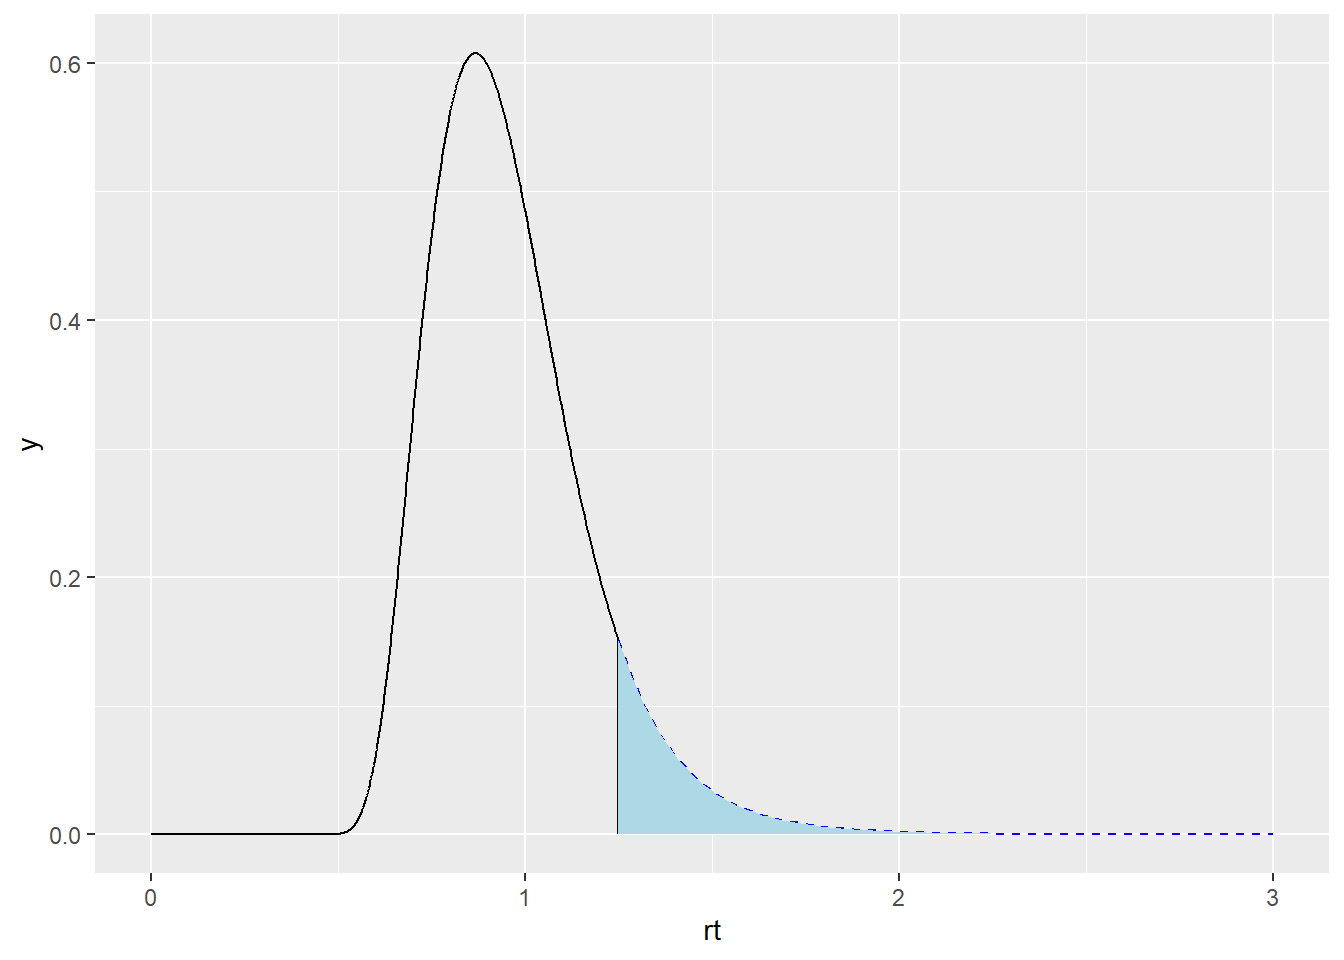

In [ ]:
truncdLBA <- function(rt, ..., LT = 0, UT = Inf) {
  ifelse(rt < LT | rt > UT, 0, dLBA(rt, ...))
}

LT = 0
UT = 1.25

parsLBA <- c(log(2),3,1,log(2),log(.75),log(.2))
names(parsLBA) <- c("B", "v", "v_lMd", "A", "sv_lMd", "t0")

ggplot(data.frame(rt = seq(0, 3, length.out = 1000)), aes(rt)) +
  stat_function(fun = truncdLBA,
                args = list(response = 1, A=2, b= 4, t0 = .2, mean_v=c(3,4), sd_v=c(1,1), LT = LT, UT = UT),
                xlim = c(0, UT+0.0001),
                n = 1001) +
  stat_function(fun = dLBA,
                args = list(response = 1, A=2, b=4, t0 = .2, mean_v=c(3,4), sd_v=c(1,1)),
                xlim = c(UT, 3),
                color = "blue",
                linetype = "dashed")+
  stat_function(fun = dLBA,
                args = list(response = 1, A=2, b=4, t0 = .2, mean_v=c(3,4), sd_v=c(1,1)),
                xlim = c(UT, 3),
                geom = "area",
                fill = "lightblue")